In [2]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline, ModelType

In [3]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [4]:
# Augment by 5%, 10%, and 20%
augmented_random_5 = augment_data(original_train_data, 0.05, MODE.RANDOM)
augmented_random_10 = augment_data(original_train_data,  0.10, MODE.RANDOM)
augmented_random_20 = augment_data(original_train_data,  0.20, MODE.RANDOM)
augmented_random_50 = augment_data(original_train_data,  0.50, MODE.RANDOM)
augmented_random_100 = augment_data(original_train_data,  1.00, MODE.RANDOM)

# Convert augmented data into Datasets
augmented_random_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_5],
    "label": [item["label"] for item in augmented_random_5]
}, features=features)

augmented_random_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_10],
    "label": [item["label"] for item in augmented_random_10]
}, features=features)

augmented_random_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_20],
    "label": [item["label"] for item in augmented_random_20]
}, features=features)

augmented_random_50_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_50],
    "label": [item["label"] for item in augmented_random_50]
}, features=features)

augmented_random_100_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_random_100],
    "label": [item["label"] for item in augmented_random_100]
}, features=features)

# Concatenate original and augmented datasets
augmented_random_train_data_5 = concatenate_datasets([original_train_data, augmented_random_5_dataset])
augmented_random_train_data_10 = concatenate_datasets([original_train_data, augmented_random_10_dataset])
augmented_random_train_data_20 = concatenate_datasets([original_train_data, augmented_random_20_dataset])
augmented_random_train_data_50 = concatenate_datasets([original_train_data, augmented_random_50_dataset])
augmented_random_train_data_100 = concatenate_datasets([original_train_data, augmented_random_100_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_random_train_data_5)}")
print(f"Train size after 10% augmentation: {len(augmented_random_train_data_10)}")
print(f"Train size after 20% augmentation: {len(augmented_random_train_data_20)}")
print(f"Train size after 50% augmentation: {len(augmented_random_train_data_50)}")
print(f"Train size after 100% augmentation: {len(augmented_random_train_data_100)}")

Original train size: 8530
Train size after 5% augmentation: 8956
Train size after 10% augmentation: 9382
Train size after 20% augmentation: 10235
Train size after 50% augmentation: 12794
Train size after 100% augmentation: 17058


In [13]:
pipeline_random_5= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_10 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_20 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_50 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_random_100 = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [14]:
pipeline_random_5.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.59it/s]


Epoch: 1/10
Train Loss: 0.672, Train Acc: 0.604
Valid Loss: 0.636, Valid Acc: 0.663


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.53it/s]


Epoch: 2/10
Train Loss: 0.601, Train Acc: 0.704
Valid Loss: 0.625, Valid Acc: 0.669


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.15it/s]


Epoch: 3/10
Train Loss: 0.566, Train Acc: 0.741
Valid Loss: 0.569, Valid Acc: 0.737


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.50it/s]


Epoch: 4/10
Train Loss: 0.535, Train Acc: 0.775
Valid Loss: 0.565, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.66it/s]


Epoch: 5/10
Train Loss: 0.518, Train Acc: 0.792
Valid Loss: 0.555, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.61it/s]


Epoch: 6/10
Train Loss: 0.507, Train Acc: 0.805
Valid Loss: 0.550, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.63it/s]


Epoch: 7/10
Train Loss: 0.484, Train Acc: 0.831
Valid Loss: 0.539, Valid Acc: 0.765


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]


Epoch: 8/10
Train Loss: 0.468, Train Acc: 0.845
Valid Loss: 0.539, Valid Acc: 0.758


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.83it/s]


Epoch: 9/10
Train Loss: 0.457, Train Acc: 0.860
Valid Loss: 0.546, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.48it/s]

Epoch: 10/10
Train Loss: 0.444, Train Acc: 0.874
Valid Loss: 0.539, Valid Acc: 0.759


In [15]:
pipeline_random_10.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]


Epoch: 1/10
Train Loss: 0.669, Train Acc: 0.616
Valid Loss: 0.624, Valid Acc: 0.665


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.95it/s]


Epoch: 2/10
Train Loss: 0.592, Train Acc: 0.711
Valid Loss: 0.573, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.23it/s]


Epoch: 3/10
Train Loss: 0.548, Train Acc: 0.762
Valid Loss: 0.559, Valid Acc: 0.743


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]


Epoch: 4/10
Train Loss: 0.528, Train Acc: 0.782
Valid Loss: 0.553, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.21it/s]


Epoch: 5/10
Train Loss: 0.509, Train Acc: 0.803
Valid Loss: 0.544, Valid Acc: 0.769


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]


Epoch: 6/10
Train Loss: 0.490, Train Acc: 0.823
Valid Loss: 0.546, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]


Epoch: 7/10
Train Loss: 0.475, Train Acc: 0.842
Valid Loss: 0.534, Valid Acc: 0.779


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]


Epoch: 8/10
Train Loss: 0.460, Train Acc: 0.854
Valid Loss: 0.531, Valid Acc: 0.775


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.73it/s]


Epoch: 9/10
Train Loss: 0.452, Train Acc: 0.865
Valid Loss: 0.531, Valid Acc: 0.774


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

Epoch: 10/10
Train Loss: 0.442, Train Acc: 0.875
Valid Loss: 0.528, Valid Acc: 0.779


In [16]:
pipeline_random_20.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]


Epoch: 1/10
Train Loss: 0.674, Train Acc: 0.600
Valid Loss: 0.623, Valid Acc: 0.681


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]


Epoch: 2/10
Train Loss: 0.597, Train Acc: 0.709
Valid Loss: 0.581, Valid Acc: 0.725


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]


Epoch: 3/10
Train Loss: 0.552, Train Acc: 0.754
Valid Loss: 0.571, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]


Epoch: 4/10
Train Loss: 0.527, Train Acc: 0.783
Valid Loss: 0.545, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]


Epoch: 5/10
Train Loss: 0.508, Train Acc: 0.805
Valid Loss: 0.548, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]


Epoch: 6/10
Train Loss: 0.488, Train Acc: 0.825
Valid Loss: 0.534, Valid Acc: 0.765


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.06it/s]


Epoch: 7/10
Train Loss: 0.468, Train Acc: 0.844
Valid Loss: 0.536, Valid Acc: 0.771


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]


Epoch: 8/10
Train Loss: 0.462, Train Acc: 0.850
Valid Loss: 0.526, Valid Acc: 0.778


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]


Epoch: 9/10
Train Loss: 0.444, Train Acc: 0.871
Valid Loss: 0.527, Valid Acc: 0.779


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]

Epoch: 10/10
Train Loss: 0.432, Train Acc: 0.884
Valid Loss: 0.520, Valid Acc: 0.787


In [17]:
pipeline_random_50.train_model(n_epochs=10)

evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.68it/s]


Epoch: 1/10
Train Loss: 0.655, Train Acc: 0.638
Valid Loss: 0.607, Valid Acc: 0.696


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.40it/s]


Epoch: 2/10
Train Loss: 0.573, Train Acc: 0.737
Valid Loss: 0.562, Valid Acc: 0.739


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.44it/s]


Epoch: 3/10
Train Loss: 0.527, Train Acc: 0.785
Valid Loss: 0.542, Valid Acc: 0.763


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.56it/s]


Epoch: 4/10
Train Loss: 0.498, Train Acc: 0.817
Valid Loss: 0.539, Valid Acc: 0.767


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.73it/s]


Epoch: 5/10
Train Loss: 0.485, Train Acc: 0.825
Valid Loss: 0.520, Valid Acc: 0.792


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.51it/s]


Epoch: 6/10
Train Loss: 0.458, Train Acc: 0.858
Valid Loss: 0.522, Valid Acc: 0.790


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.58it/s]


Epoch: 7/10
Train Loss: 0.442, Train Acc: 0.873
Valid Loss: 0.503, Valid Acc: 0.812


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.57it/s]


Epoch: 8/10
Train Loss: 0.427, Train Acc: 0.889
Valid Loss: 0.498, Valid Acc: 0.811


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]


Epoch: 9/10
Train Loss: 0.415, Train Acc: 0.901
Valid Loss: 0.497, Valid Acc: 0.814


evaluating...: 100%|██████████| 5/5 [00:00<00:00,  6.64it/s]

Epoch: 10/10
Train Loss: 0.407, Train Acc: 0.910
Valid Loss: 0.494, Valid Acc: 0.817


In [18]:
pipeline_random_100.train_model(n_epochs=10)

evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.45it/s]


Epoch: 1/10
Train Loss: 0.636, Train Acc: 0.661
Valid Loss: 0.572, Valid Acc: 0.739


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.44it/s]


Epoch: 2/10
Train Loss: 0.546, Train Acc: 0.764
Valid Loss: 0.535, Valid Acc: 0.780


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.16it/s]


Epoch: 3/10
Train Loss: 0.510, Train Acc: 0.803
Valid Loss: 0.520, Valid Acc: 0.791


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]


Epoch: 4/10
Train Loss: 0.480, Train Acc: 0.832
Valid Loss: 0.506, Valid Acc: 0.803


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.16it/s]


Epoch: 5/10
Train Loss: 0.449, Train Acc: 0.868
Valid Loss: 0.491, Valid Acc: 0.820


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.10it/s]


Epoch: 6/10
Train Loss: 0.427, Train Acc: 0.891
Valid Loss: 0.485, Valid Acc: 0.825


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.41it/s]


Epoch: 7/10
Train Loss: 0.414, Train Acc: 0.905
Valid Loss: 0.473, Valid Acc: 0.839


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.38it/s]


Epoch: 8/10
Train Loss: 0.401, Train Acc: 0.917
Valid Loss: 0.476, Valid Acc: 0.835


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


Epoch: 9/10
Train Loss: 0.395, Train Acc: 0.923
Valid Loss: 0.464, Valid Acc: 0.850


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.38it/s]

Epoch: 10/10
Train Loss: 0.389, Train Acc: 0.929
Valid Loss: 0.461, Valid Acc: 0.849


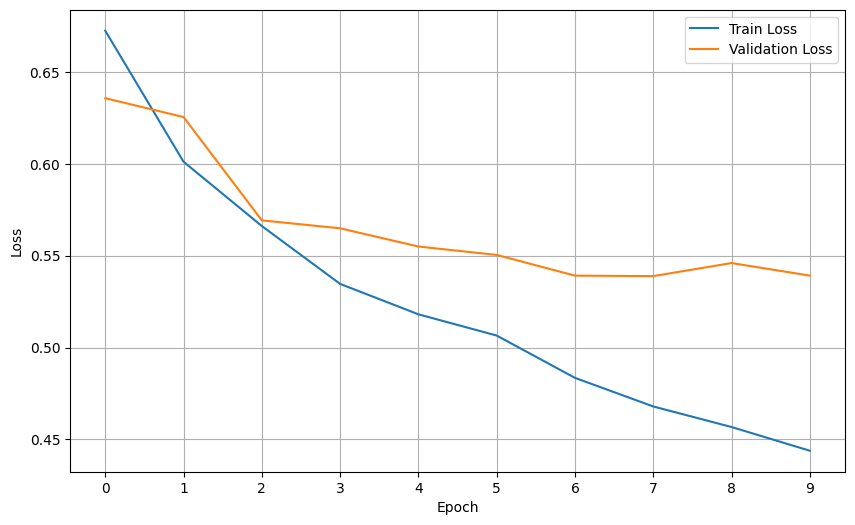

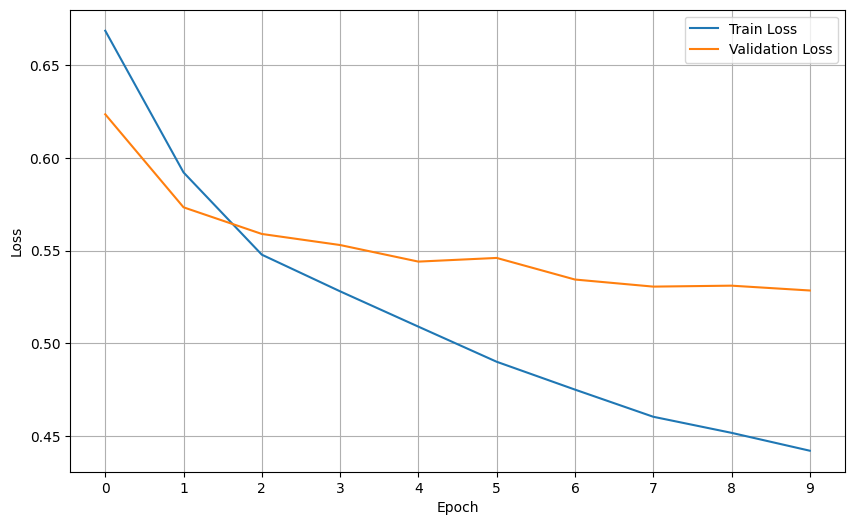

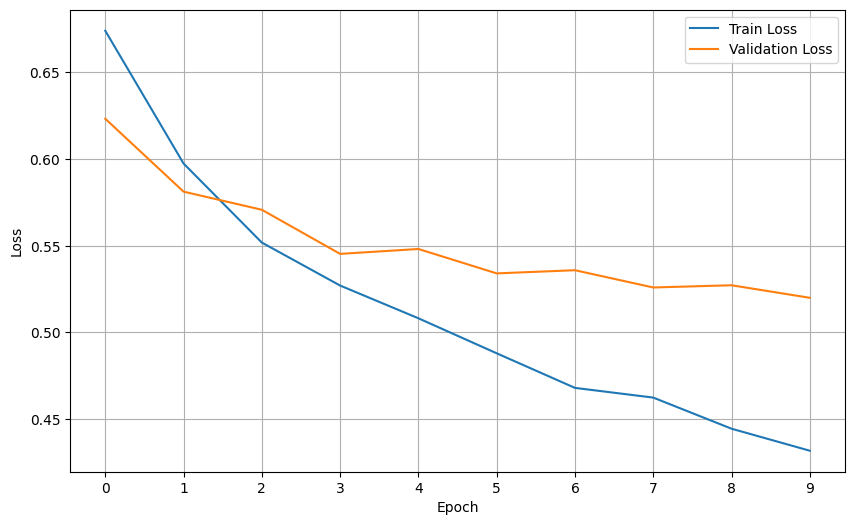

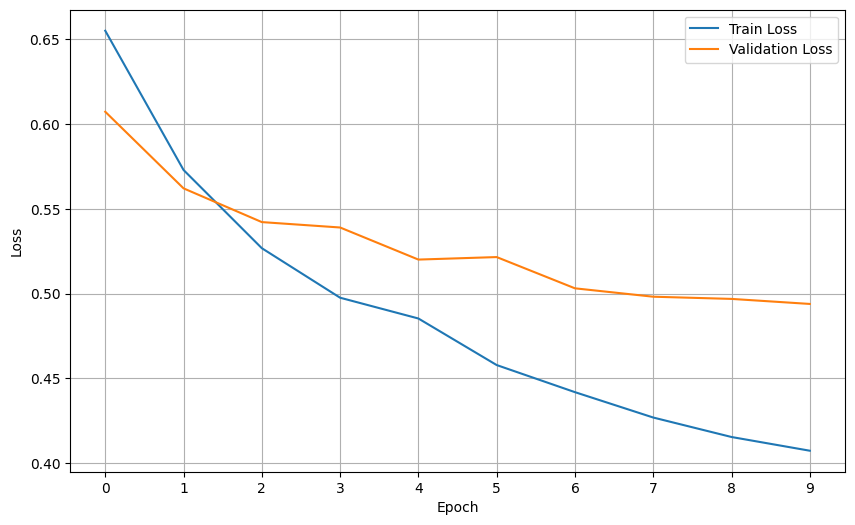

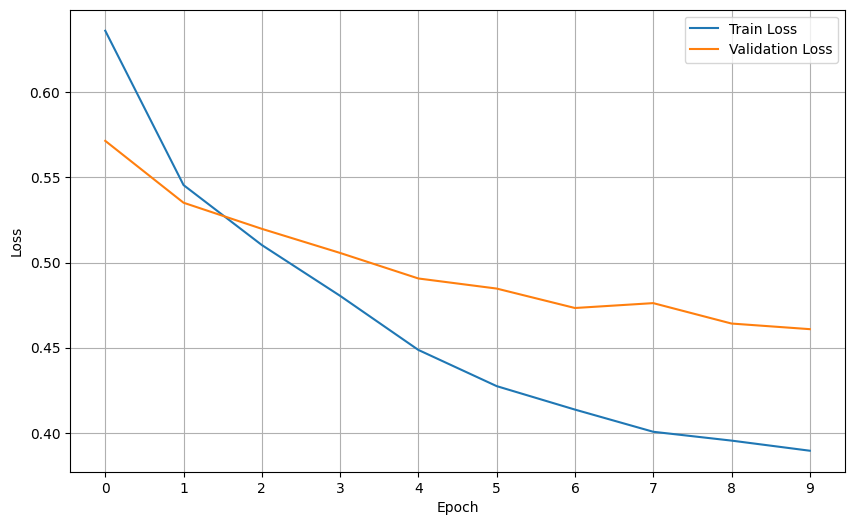

In [19]:
# Plot the loss graph
pipeline_random_5.plot_loss()
pipeline_random_10.plot_loss()
pipeline_random_20.plot_loss()
pipeline_random_50.plot_loss()
pipeline_random_100.plot_loss()

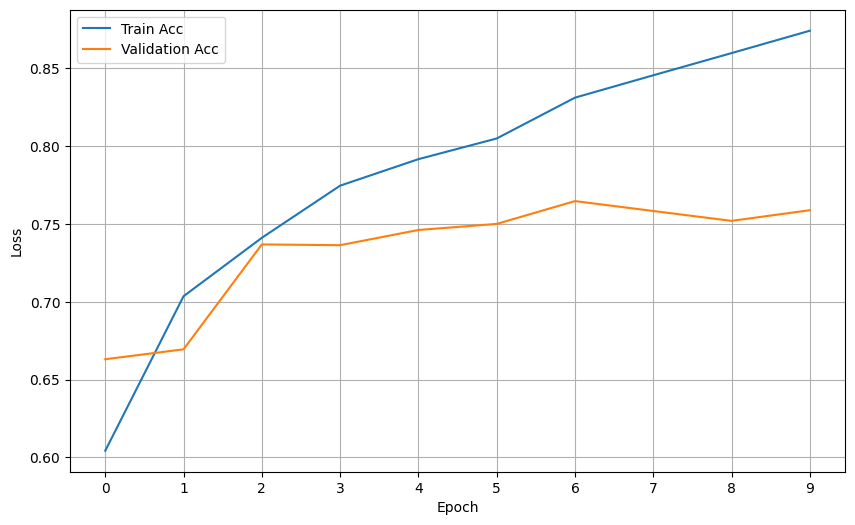

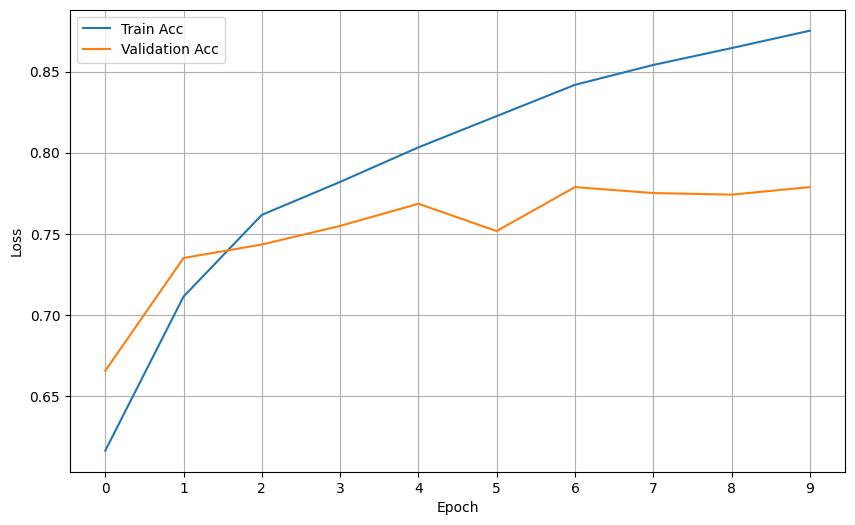

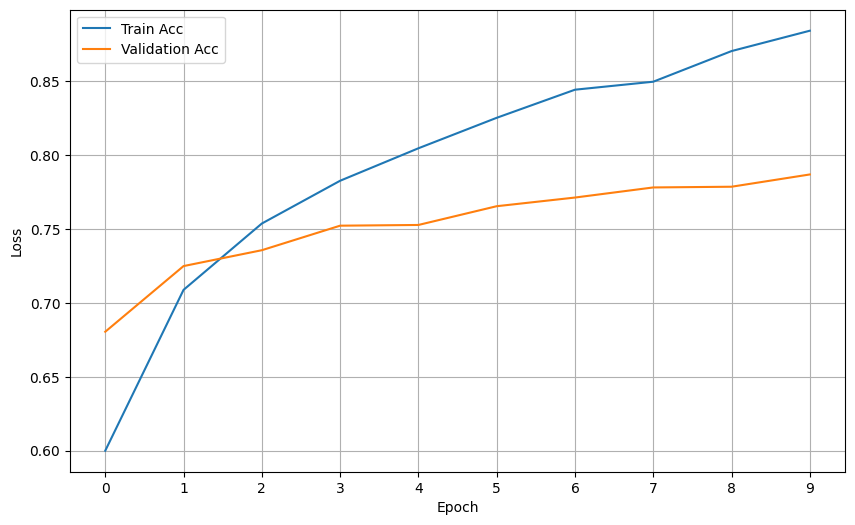

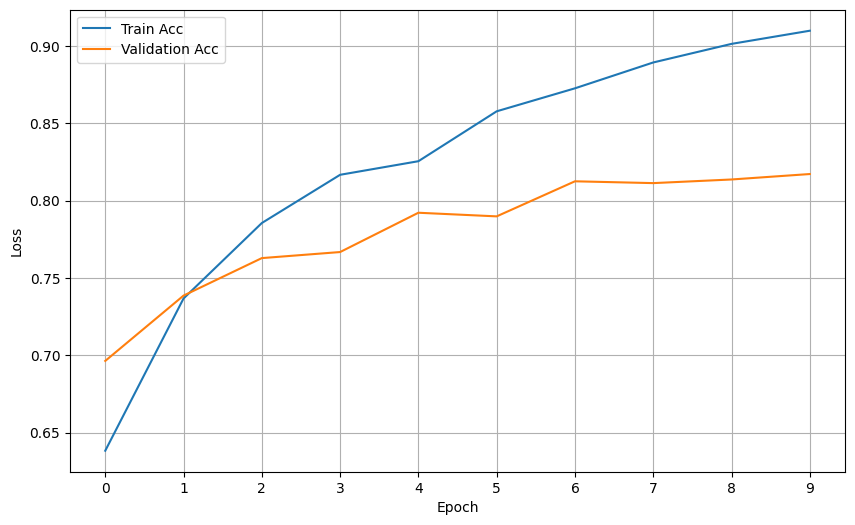

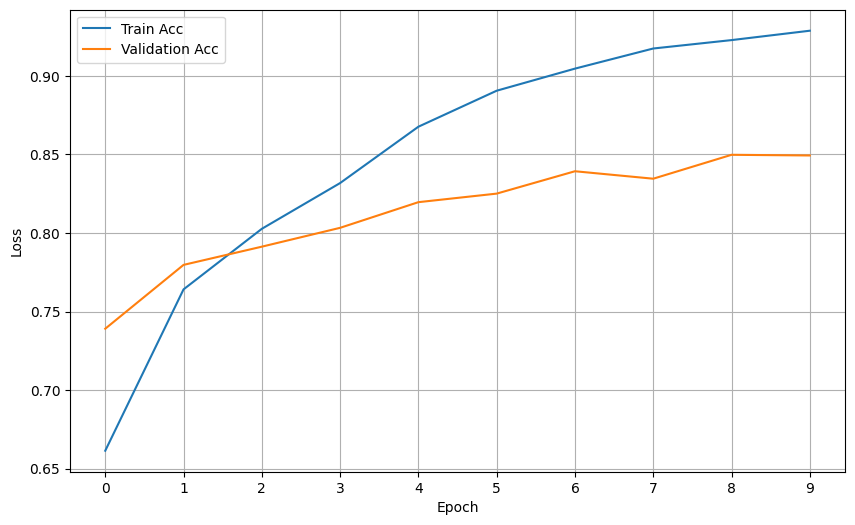

In [20]:
# Plot the acc graph
pipeline_random_5.plot_acc()
pipeline_random_10.plot_acc()
pipeline_random_20.plot_acc()
pipeline_random_50.plot_acc()
pipeline_random_100.plot_acc()

# Performance of random swap augmentation with LSTM

In [5]:
pipeline_random_5_LSTM= TextClassificationPipeline(
    augmented_data=augmented_random_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_10_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_20_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_50_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_random_100_LSTM = TextClassificationPipeline(
    augmented_data=augmented_random_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)


Map:   0%|          | 0/8956 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7164 [00:00<?, ? examples/s]

Map:   0%|          | 0/1792 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/9382 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/7505 [00:00<?, ? examples/s]

Map:   0%|          | 0/1877 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8188 [00:00<?, ? examples/s]

Map:   0%|          | 0/2047 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/12794 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/10235 [00:00<?, ? examples/s]

Map:   0%|          | 0/2559 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [8]:
pipeline_random_5_LSTM.train_model(n_epochs=10)
pipeline_random_10_LSTM.train_model(n_epochs=10)
pipeline_random_20_LSTM.train_model(n_epochs=10)
pipeline_random_50_LSTM.train_model(n_epochs=10)
pipeline_random_100_LSTM.train_model(n_epochs=10)


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]


Epoch: 1/10
Train Loss: 0.686, Train Acc: 0.570
Valid Loss: 0.662, Valid Acc: 0.627


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


Epoch: 2/10
Train Loss: 0.602, Train Acc: 0.698
Valid Loss: 0.583, Valid Acc: 0.711


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]


Epoch: 3/10
Train Loss: 0.549, Train Acc: 0.751
Valid Loss: 0.570, Valid Acc: 0.726


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]


Epoch: 4/10
Train Loss: 0.522, Train Acc: 0.783
Valid Loss: 0.573, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]


Epoch: 5/10
Train Loss: 0.501, Train Acc: 0.805
Valid Loss: 0.563, Valid Acc: 0.731


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]


Epoch: 6/10
Train Loss: 0.487, Train Acc: 0.822
Valid Loss: 0.575, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]


Epoch: 7/10
Train Loss: 0.508, Train Acc: 0.798
Valid Loss: 0.576, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]


Epoch: 8/10
Train Loss: 0.485, Train Acc: 0.825
Valid Loss: 0.571, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]


Epoch: 9/10
Train Loss: 0.467, Train Acc: 0.844
Valid Loss: 0.564, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]


Epoch: 10/10
Train Loss: 0.459, Train Acc: 0.853
Valid Loss: 0.565, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]


Epoch: 1/10
Train Loss: 0.682, Train Acc: 0.582
Valid Loss: 0.637, Valid Acc: 0.659


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]


Epoch: 2/10
Train Loss: 0.599, Train Acc: 0.698
Valid Loss: 0.576, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]


Epoch: 3/10
Train Loss: 0.563, Train Acc: 0.741
Valid Loss: 0.583, Valid Acc: 0.710


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]


Epoch: 4/10
Train Loss: 0.539, Train Acc: 0.762
Valid Loss: 0.542, Valid Acc: 0.761


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]


Epoch: 5/10
Train Loss: 0.518, Train Acc: 0.787
Valid Loss: 0.545, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


Epoch: 6/10
Train Loss: 0.503, Train Acc: 0.806
Valid Loss: 0.542, Valid Acc: 0.763


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


Epoch: 7/10
Train Loss: 0.485, Train Acc: 0.824
Valid Loss: 0.524, Valid Acc: 0.775


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


Epoch: 8/10
Train Loss: 0.469, Train Acc: 0.840
Valid Loss: 0.524, Valid Acc: 0.780


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]


Epoch: 9/10
Train Loss: 0.456, Train Acc: 0.854
Valid Loss: 0.535, Valid Acc: 0.772


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


Epoch: 10/10
Train Loss: 0.446, Train Acc: 0.864
Valid Loss: 0.531, Valid Acc: 0.775


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]


Epoch: 1/10
Train Loss: 0.690, Train Acc: 0.539
Valid Loss: 0.667, Valid Acc: 0.645


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]


Epoch: 2/10
Train Loss: 0.611, Train Acc: 0.695
Valid Loss: 0.561, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]


Epoch: 3/10
Train Loss: 0.554, Train Acc: 0.750
Valid Loss: 0.543, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]


Epoch: 4/10
Train Loss: 0.519, Train Acc: 0.783
Valid Loss: 0.532, Valid Acc: 0.768


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]


Epoch: 5/10
Train Loss: 0.504, Train Acc: 0.804
Valid Loss: 0.572, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]


Epoch: 6/10
Train Loss: 0.508, Train Acc: 0.799
Valid Loss: 0.538, Valid Acc: 0.771


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]


Epoch: 7/10
Train Loss: 0.484, Train Acc: 0.824
Valid Loss: 0.532, Valid Acc: 0.767


evaluating...: 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]


Epoch: 8/10
Train Loss: 0.482, Train Acc: 0.828
Valid Loss: 0.648, Valid Acc: 0.656


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]


Epoch: 9/10
Train Loss: 0.539, Train Acc: 0.763
Valid Loss: 0.550, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]


Epoch: 10/10
Train Loss: 0.479, Train Acc: 0.832
Valid Loss: 0.541, Valid Acc: 0.766


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Epoch: 1/10
Train Loss: 0.675, Train Acc: 0.579
Valid Loss: 0.617, Valid Acc: 0.665


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]


Epoch: 2/10
Train Loss: 0.577, Train Acc: 0.719
Valid Loss: 0.556, Valid Acc: 0.742


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]


Epoch: 3/10
Train Loss: 0.535, Train Acc: 0.768
Valid Loss: 0.543, Valid Acc: 0.763


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


Epoch: 4/10
Train Loss: 0.500, Train Acc: 0.806
Valid Loss: 0.543, Valid Acc: 0.755


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]


Epoch: 5/10
Train Loss: 0.487, Train Acc: 0.819
Valid Loss: 0.545, Valid Acc: 0.758


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]


Epoch: 6/10
Train Loss: 0.466, Train Acc: 0.843
Valid Loss: 0.516, Valid Acc: 0.789


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


Epoch: 7/10
Train Loss: 0.448, Train Acc: 0.861
Valid Loss: 0.511, Valid Acc: 0.797


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


Epoch: 8/10
Train Loss: 0.434, Train Acc: 0.878
Valid Loss: 0.522, Valid Acc: 0.787


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


Epoch: 9/10
Train Loss: 0.440, Train Acc: 0.871
Valid Loss: 0.513, Valid Acc: 0.796


evaluating...: 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]


Epoch: 10/10
Train Loss: 0.429, Train Acc: 0.882
Valid Loss: 0.516, Valid Acc: 0.794


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Epoch: 1/10
Train Loss: 0.653, Train Acc: 0.610
Valid Loss: 0.572, Valid Acc: 0.719


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Epoch: 2/10
Train Loss: 0.547, Train Acc: 0.754
Valid Loss: 0.556, Valid Acc: 0.737


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Epoch: 3/10
Train Loss: 0.509, Train Acc: 0.797
Valid Loss: 0.523, Valid Acc: 0.787


evaluating...: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


Epoch: 4/10
Train Loss: 0.484, Train Acc: 0.824
Valid Loss: 0.519, Valid Acc: 0.783


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Epoch: 5/10
Train Loss: 0.466, Train Acc: 0.844
Valid Loss: 0.501, Valid Acc: 0.807


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]


Epoch: 6/10
Train Loss: 0.451, Train Acc: 0.860
Valid Loss: 0.505, Valid Acc: 0.805


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


Epoch: 7/10
Train Loss: 0.442, Train Acc: 0.869
Valid Loss: 0.493, Valid Acc: 0.817


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Epoch: 8/10
Train Loss: 0.466, Train Acc: 0.844
Valid Loss: 0.552, Valid Acc: 0.750


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]


Epoch: 9/10
Train Loss: 0.464, Train Acc: 0.848
Valid Loss: 0.530, Valid Acc: 0.779


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

Epoch: 10/10
Train Loss: 0.446, Train Acc: 0.866
Valid Loss: 0.486, Valid Acc: 0.824


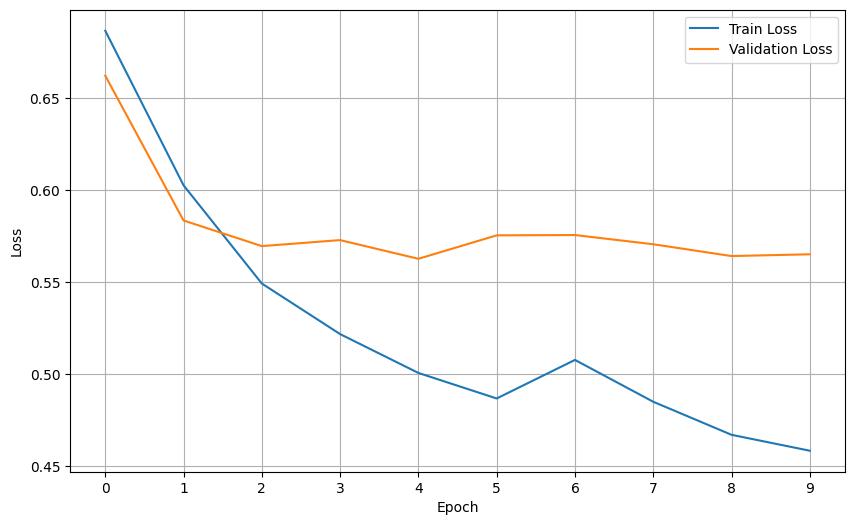

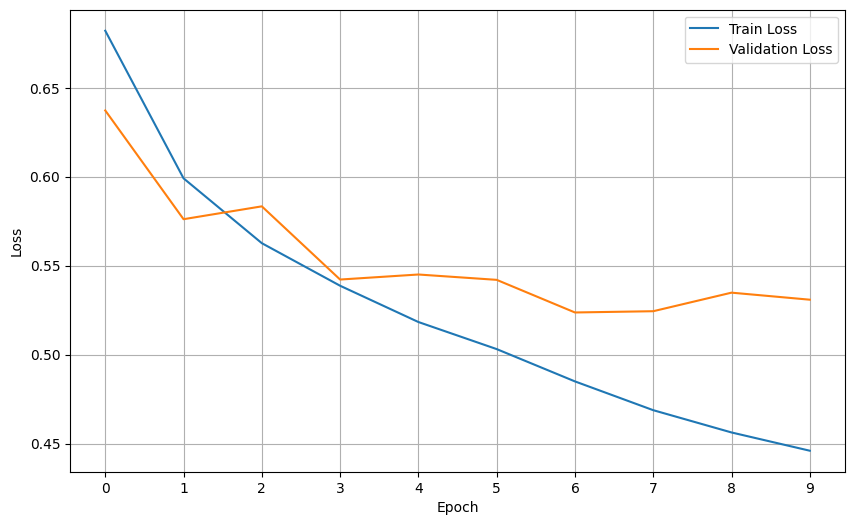

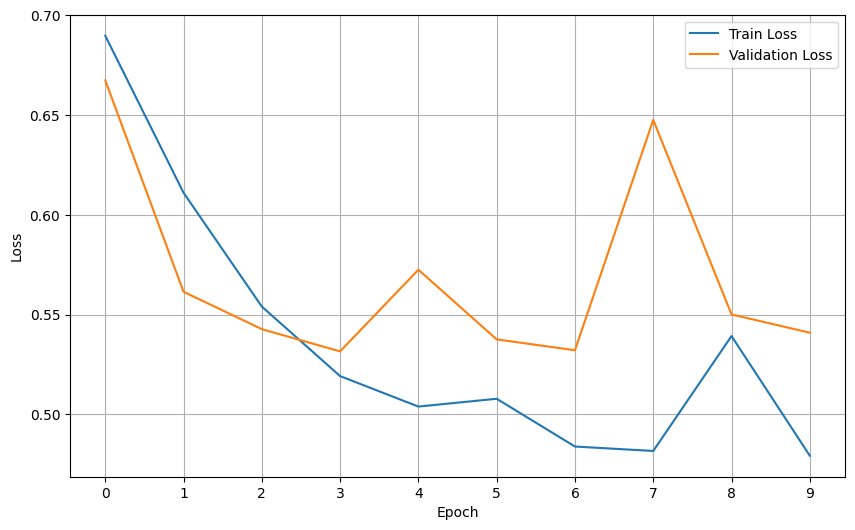

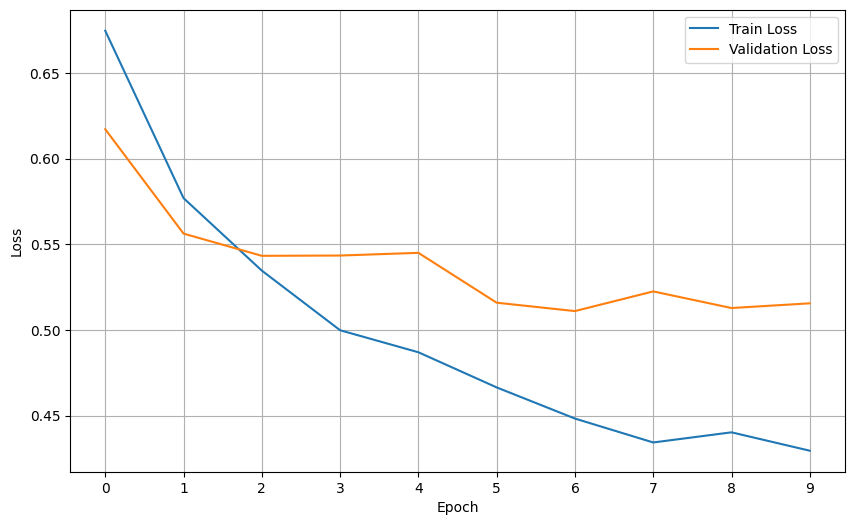

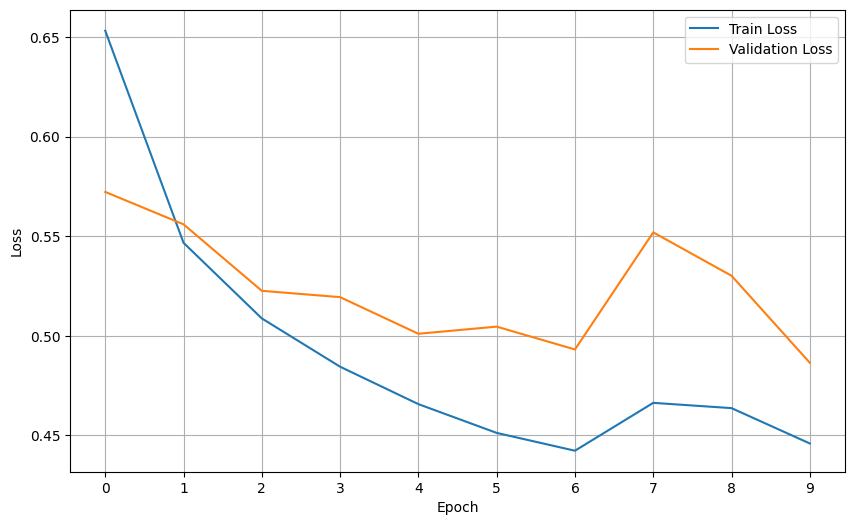

In [9]:
# Plot the loss graph
pipeline_random_5_LSTM.plot_loss()
pipeline_random_10_LSTM.plot_loss()
pipeline_random_20_LSTM.plot_loss()
pipeline_random_50_LSTM.plot_loss()
pipeline_random_100_LSTM.plot_loss()

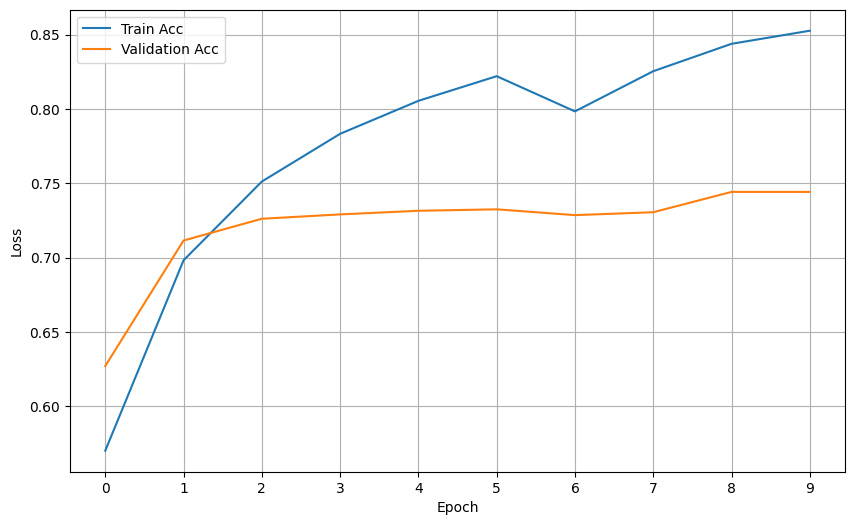

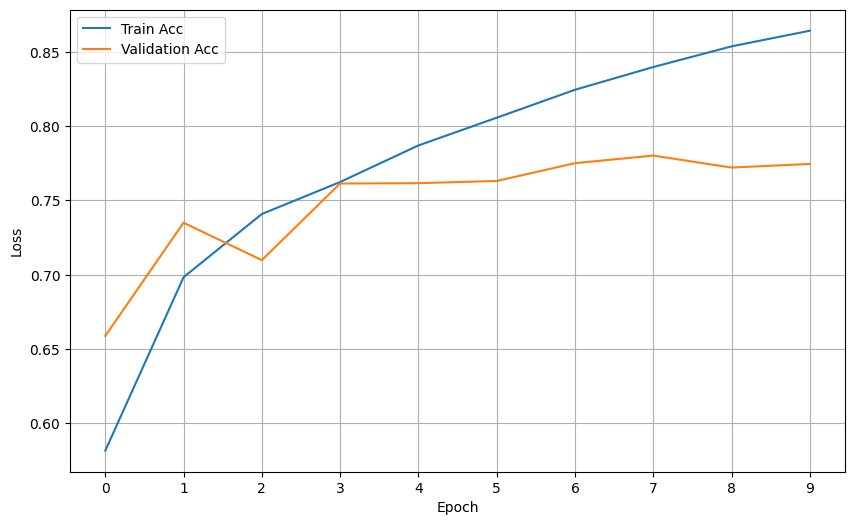

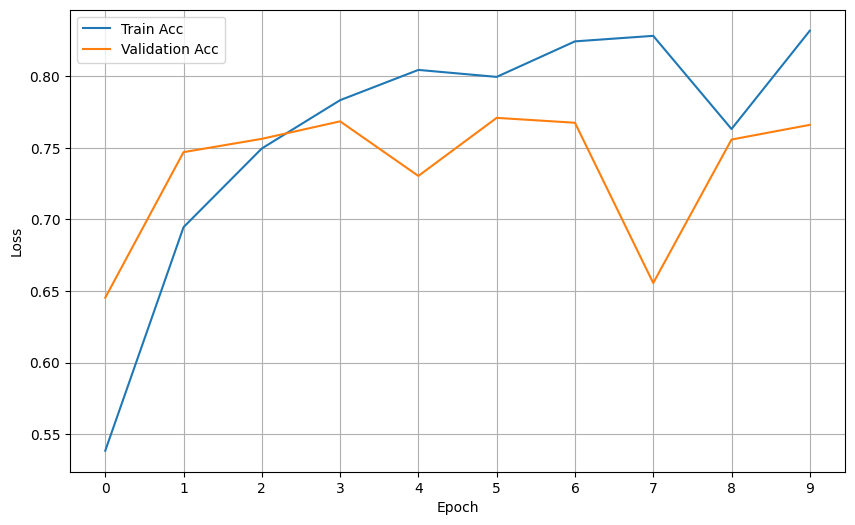

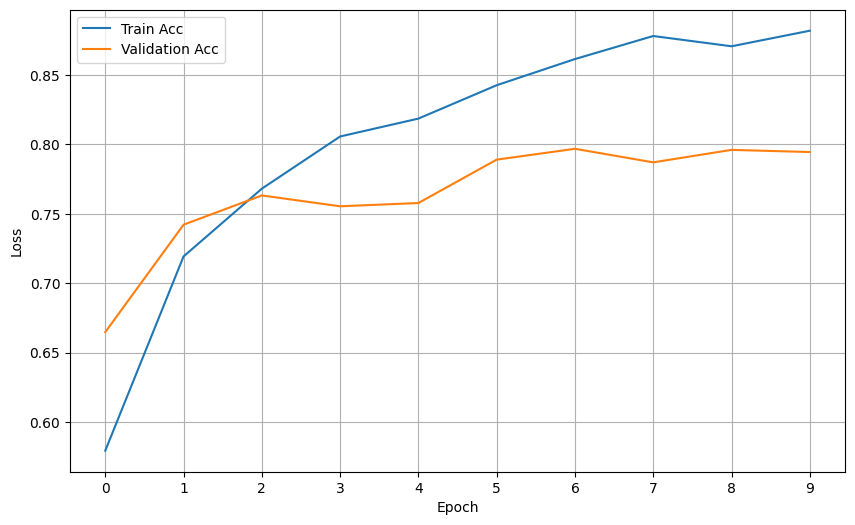

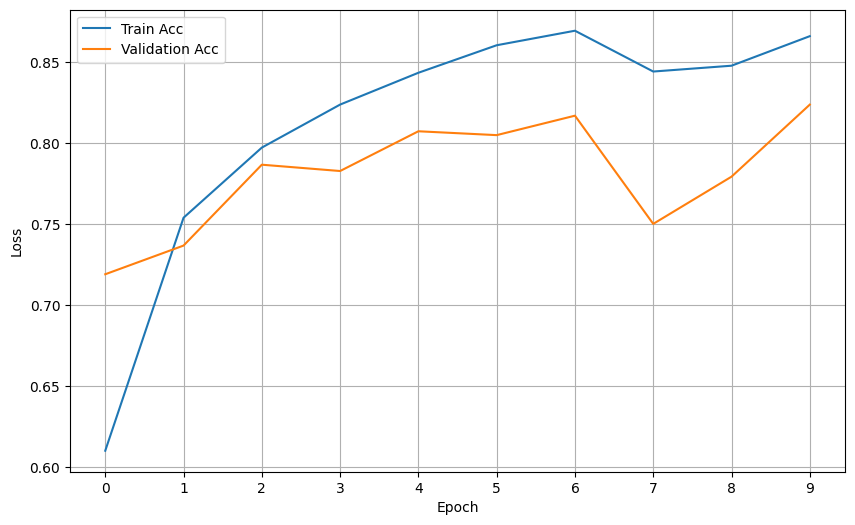

In [10]:
# Plot the acc graph
pipeline_random_5_LSTM.plot_acc()
pipeline_random_10_LSTM.plot_acc()
pipeline_random_20_LSTM.plot_acc()
pipeline_random_50_LSTM.plot_acc()
pipeline_random_100_LSTM.plot_acc()